In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import requests

In [9]:
url = "https://api.massive.com/v3/reference/dividends?apiKey=U910Z3ZVguSun5juGJhijpE358Qe3jGB"
response = requests.get(url)
api_data = response.json()

In [10]:
apple_df = pd.DataFrame(api_data['results'])

In [11]:
apple_df

,cash_amount,currency,dividend_type,ex_dividend_date,frequency,id,pay_date,record_date,ticker
0,0.489757,USD,CD,2030-12-13,4,E396fbae341a40e1373ea57ce984c386f06778209996e5...,2030-12-31,2030-12-15,GECCG
1,0.484375,USD,CD,2030-09-13,4,Edd95a7bbac516897f19e62104fce597fc22bed2b4fa9a...,2030-09-30,2030-09-15,GECCG
2,0.515625,USD,CD,2030-07-15,4,E423cf49e82932f378c27034ec2bd6fe3830606caa42d3...,2030-07-30,2030-07-15,METCI
3,0.478993,USD,CD,2030-06-14,4,Ee89ffa0dc20c03663d643fdbdb9d85f34460b75a2c6f0...,2030-06-30,2030-06-15,GECCG
4,0.515625,USD,CD,2030-04-15,4,Ee4b12dadef7b17bcd4e3d76116f70a5fc96fcab3db650...,2030-04-30,2030-04-15,METCI
5,0.484375,USD,CD,2030-03-15,4,Ec34ea155d7551d9173210ad0e95af0c182a06a9fd8aac...,2030-03-31,2030-03-15,GECCG
6,0.515625,USD,CD,2030-01-15,4,E17f2cf2abb9543b8bffd00f02f56b8a1a8a73122d569b...,2030-01-30,2030-01-15,METCI
7,0.513450,USD,CD,2029-12-14,4,E5517750748dca0bc3e1e237ccfd6468a93f3d2ab543df...,2029-12-31,2029-12-15,GECCH
8,0.489757,USD,CD,2029-12-14,4,E5d7b63304e28504869d352068e9f88fc8d611566ff232...,2029-12-31,2029-12-15,GECCG
9,0.523440,USD,CD,2029-10-15,4,E3ebcc99c39df43869a525f4d4a5c5adef586ddc1f477d...,2029-10-30,2029-10-15,METCZ


In [14]:
# Use one of the real column names from your list
apple_df['ex_dividend_date'] = pd.to_datetime(apple_df['ex_dividend_date'])

In [17]:
# We use 'ex_dividend_date' because 'date' doesn't exist in your list
apple_df = apple_df.set_index('ex_dividend_date')

In [19]:
mapping = {
    'o': 'open',
    'c': 'close',
    'h': 'high',
    'l': 'low',
    'n': 'number',
    'v': 'volume',
    'vw': 'avg_price'
}
apple_df = apple_df.rename(columns=mapping)

<Axes: title={'center': 'Apple Dividend Payments'}, xlabel='ex_dividend_date'>

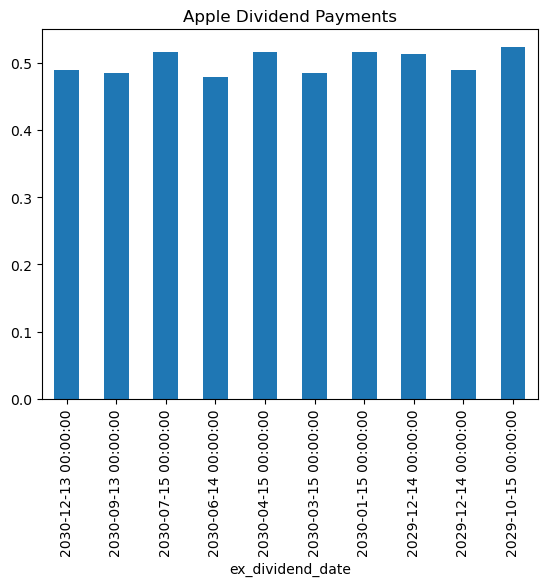

In [21]:
apple_df['cash_amount'].plot(kind='bar', title='Apple Dividend Payments')

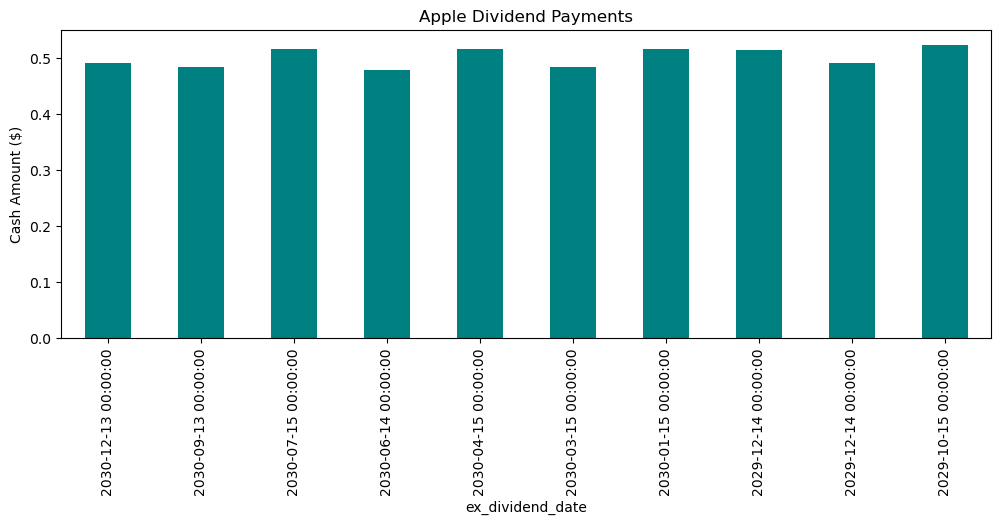

In [23]:
# This plots the actual dividend dollar amount over time
apple_df['cash_amount'].plot(kind='bar', figsize=(12, 4), color='teal')

import matplotlib.pyplot as plt
plt.title("Apple Dividend Payments")
plt.ylabel("Cash Amount ($)")
plt.show()

In [25]:
!pip install nbresult